1. Aplicación de Modelos de Machine Learning e inteligencia artificial en la Predicción de Ventas Cruzadas para un Caso de Seguros de Salud y automovil

2. Análisis y Modelación de la Predicción de Ventas Cruzadas en Seguros de Salud y automovil mediante la implementacion de algoritmos de Inteligencia Artificial y machine learning 

Planteamiento del problema 

Los datos son proporcionados por una compañía de seguros que ha ofrecido seguros de salud a sus clientes. La finalidad de estos datos es ayudar en la construcción de un modelo que pueda predecir si los titulares de pólizas (clientes) del año pasado también estarían interesados en los seguros de vehículos ofrecidos por la misma compañía.

En el contexto del seguro, una póliza es un contrato en el cual la compañía se compromete a proporcionar una garantía de compensación por pérdida, daño, enfermedad o muerte especificados a cambio de una prima. La prima es una cantidad pagada regularmente por esta garantía.

Los seguros de salud y vehículos funcionan en principios similares, pero cubren diferentes tipos de riesgos. El seguro de salud cubre los costos de atención médica hasta un límite especificado, mientras que el seguro de vehículos proporciona compensación en caso de accidentes o daños en el vehículo.

La tarea de predicción de venta cruzada de seguros de salud (Health Insurance Cross-Sell Prediction) implica predecir si un cliente que ya ha adquirido un tipo de seguro estaría interesado en adquirir otro tipo de seguro. En este caso, la compañía desea determinar si los clientes que ya poseen seguros de salud estarían interesados en su oferta de seguros de vehículos. La venta cruzada es una práctica común en la industria de seguros, y las predicciones en este ámbito pueden ser valiosas para las estrategias de marketing y ventas, permitiendo a la compañía optimizar su comunicación y generar mayores ingresos.

Los datos en este contexto se pueden utilizar para entrenar un modelo de aprendizaje automático para predecir si un cliente estaría interesado en comprar un seguro de vehículos. La selección y transformación adecuadas de las características, así como el manejo de datos faltantes y atípicos, serían pasos clave en el proceso de modelado. La información proporcionada incluye datos demográficos, detalles de vehículos y políticas, que pueden ser procesados y utilizados para desarrollar un modelo predictivo eficiente y efectivo.

Los datos fueron sacados de la pagina https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction los cuales se dividen en 2 grupos datos de entrenamientos y datos de prueba 

Primero, importaremos bibliotecas esenciales como pandas y numpy para manejar datos, seaborn y matplotlib para visualización, y sklearn para el aprendizaje automático. Estas bibliotecas te proporcionarán las herramientas necesarias para analizar, visualizar e implementar modelos en tu proyecto.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

Cargamos los conjuntos de datos de entrenamiento y prueba desde los archivos CSV y luego vemos sus dimensiones.

In [3]:
train = pd.read_csv('C:/Users/monte/Desktop/tesis/train.csv')
test = pd.read_csv('C:/Users/monte/Desktop/tesis/test.csv')

print("Datos de entrenamiento:", train.shape) 
print("Datos de prueba:", test.shape)   

Datos de entrenamiento: (381109, 12)
Datos de prueba: (127037, 11)


Los resultados muestran que el conjunto de entrenamiento contiene 381109 filas y 12 columnas, mientras que el conjunto de pruebas contiene 127037 filas y 11 columnas.

Vemos todos los datos

In [16]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


ID: Identificador único para cada cliente. Es un número asignado específicamente para cada cliente y no tiene ningún valor predictivo en sí mismo.

GENDER: Esta variable indica el género del cliente y puede ser útil para entender si hay diferencias en las preferencias de seguros entre hombres y mujeres.

AGE: La edad del cliente. Puede ser un factor importante para predecir la probabilidad de que un cliente esté interesado en un seguro de vehículo.

DRIVING_LICENSE: Esta variable binaria indica si el cliente tiene una licencia de conducir. Los valores son 0 para no tener licencia y 1 para tenerla.

REGION_CODE: Código único para la región del cliente. Esto puede reflejar las diferencias geográficas en las preferencias de seguros.

PREVIOUSLY_INSURED: Esta variable binaria indica si el cliente ya tiene un seguro de vehículo. Los valores son 1 si el cliente ya tiene seguro y 0 si no lo tiene.

VEHICLE_AGE: La edad del vehículo del cliente. Puede ser un factor significativo en la toma de decisiones de seguros.

VEHICLE_DAMAGE: Esta variable binaria indica si el vehículo del cliente ha sufrido daños en el pasado. Los valores son 1 si ha habido daños y 0 si no ha habido daños.

ANNUAL_PREMIUM: La cantidad que el cliente necesita pagar como prima en el año. Podría influir en la disposición del cliente a comprar un seguro.

POLICY_SALES_CHANNEL: Código anonimizado para el canal a través del cual se contactó al cliente. Puede incluir diferentes agentes, correo, teléfono, en persona, etc.

VINTAGE: Número de días que el cliente ha estado asociado con la compañía. Esto podría reflejar la lealtad o satisfacción del cliente con la compañía.

RESPONSE: Variable objetivo. Indica si el cliente está interesado en el seguro de vehículo. Los valores son 1 si el cliente está interesado y 0 si no lo está.

Preprocesamiento
Durante la fase de preprocesamiento, decidí eliminar ciertas columnas que consideré innecesarias para la construcción del modelo. Las columnas 'ID', 'Region_Code' y 'Policy_Sales_Channel' fueron descartadas por las siguientes razones:

'ID': Esta columna contiene identificadores únicos para cada cliente y no aporta ninguna información relevante para la predicción. Los identificadores son específicos para cada individuo y no tienen relación con la probabilidad de que un cliente esté interesado en el seguro de vehículos.

'Region_Code': Aunque esta columna podría tener relevancia en un contexto local, en mi caso particular no estoy familiarizado con las regiones del país de origen de los datos y, por lo tanto, me resulta difícil interpretar o utilizar esta información de manera significativa en el modelo.

'Policy_Sales_Channel': Esta columna representa códigos anonimizados para los canales de venta. Dado que no tengo acceso a información detallada sobre qué representan estos códigos y cómo se correlacionan con la propensión a comprar seguros de vehículos, decidí omitir esta variable para evitar posibles confusiones o interpretaciones erróneas en el modelo.

In [26]:
train.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1, inplace=True)
test.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1, inplace=True)

Vemos que se hayan eliminados esas 2 columnas 

In [18]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0


Tipos de datos 

In [62]:
train.dtypes

Gender                 object
Age                     int64
Driving_License         int64
Previously_Insured      int64
Vehicle_Age            object
Vehicle_Damage         object
Annual_Premium        float64
Vintage                 int64
Response                int64
dtype: object

float64: Este es un tipo de dato que representa números de coma flotante de doble precisión. Es decir, puede almacenar números reales (que incluyen tanto números enteros como decimales) y ofrece una gran precisión en los cálculos. En el contexto de tu proyecto, float64 se utiliza para la variable Annual_Premium, que probablemente necesite precisión decimal para representar correctamente las cantidades monetarias.

int64: Este es un tipo de dato que representa números enteros y puede almacenar valores tanto positivos como negativos. El "64" en int64 se refiere a la cantidad de bits utilizada para almacenar el número, lo que permite una amplia gama de valores enteros. En el proyecto, varias variables como Age, Driving_License, Previously_Insured, Vintage, y Response son de tipo int64 porque representan cantidades enteras, como la edad de una persona o valores binarios (0 o 1).

object: En el contexto de pandas (la biblioteca que estás utilizando para manejar tus datos), el tipo object suele referirse a una columna que contiene datos de texto o datos mixtos. Esto significa que la columna puede contener una mezcla de números, texto, o incluso otros tipos de datos complejos. En el conjunto de datos, las variables Gender, Vehicle_Age, y Vehicle_Damage son de tipo object, lo cual indica que estas variables son probablemente categóricas y contienen texto. Estas variables a menudo requieren un procesamiento adicional, como la codificación en valores numéricos, para ser utilizadas en un modelo de aprendizaje automático.

Verificamos si hay datos faltantes

In [63]:
train.isnull().sum()

Gender                0
Age                   0
Driving_License       0
Previously_Insured    0
Vehicle_Age           0
Vehicle_Damage        0
Annual_Premium        0
Vintage               0
Response              0
dtype: int64

Estadisticas descriptivas de los datos numericos

In [7]:
datosnumericos=['Age','Annual_Premium','Vintage']
print("Estadisticas descriptivas de los datos numericos:")
train[datosnumericos].describe()

Estadisticas descriptivas de los datos numericos:


,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


Edad (Age): Esta variable tiene un valor medio de 38.82 años, con una desviación estándar de 15.51 años. Esto significa que la mayoría de los clientes en tu conjunto de datos tienen entre 23 y 54 años (la media ± 1 desviación estándar). La edad mínima es de 20 años y la máxima de 85 años.

Prima anual (Annual_Premium): Esta variable, que representa la cantidad que el cliente necesita pagar como prima en el año, tiene un valor medio de 30,564.39. Sin embargo, la desviación estándar es bastante alta (17,213.15), lo que indica que hay una variación significativa en las primas anuales. El valor mínimo de la prima anual es de 2,630 y el valor máximo es de 540,165, lo que muestra que hay una amplia gama de primas en tu conjunto de datos.

Antigüedad (Vintage): Esta variable representa el número de días que el cliente ha estado asociado con la compañía. La media es de 154.35 días, con una desviación estándar de 83.67 días. Esto indica que la mayoría de los clientes han estado asociados con la empresa entre 70 y 238 días (la media ± 1 desviación estándar). La antigüedad mínima es de 10 días y la máxima es de 299 días.

Estadisticas de la variable response

In [57]:
response_counts = train['Response'].value_counts()
response_proportions = train['Response'].value_counts(normalize=True)
print("Cantidad:\n", response_counts)
print("Proporcion:\n", response_proportions)


Cantidad:
 Response
0    334399
1     46710
Name: count, dtype: int64
Proporcion:
 Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


Cantidad: De los 381109 clientes en tu conjunto de datos, 334399 (aproximadamente el 88%) no están interesados en adquirir un seguro de vehículo (representado por el valor 0). El restante 12% (o 46710 clientes) sí están interesados en la oferta de seguros de vehículos (representado por el valor 1).

Proporción: Esto se refleja en las proporciones, donde aproximadamente el 88% de los clientes no están interesados y alrededor del 12% sí están interesados en la oferta de seguros de vehículos.

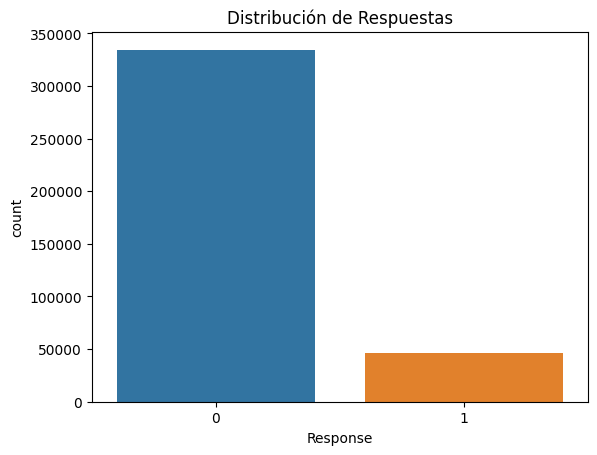

In [66]:
sns.countplot(x='Response', data=train)
plt.title('Distribución de Respuestas')
plt.show()


A partir de este gráfico, podemos observar visualmente el desequilibrio entre las dos clases de la variable 'Response'. La barra correspondiente a '0' es significativamente más alta que la barra de '1', lo que indica que una gran mayoría de los clientes en el conjunto de datos no está interesada en el seguro de vehículos. Este desequilibrio entre las clases podría plantear desafíos durante el modelado y la evaluación del modelo, ya que los modelos de aprendizaje automático tienden a estar sesgados hacia la clase mayoritaria.

Relaciones entre las variables numericas con respecto a response = 1

Edad y clientes que respondieron 1

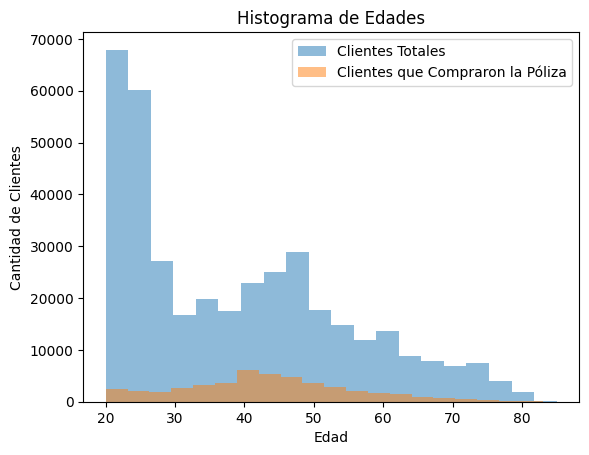

In [67]:
plt.hist(train['Age'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Age'], bins=20, alpha=0.5, label='Clientes que Compraron la Póliza')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Edades')
plt.show()


El histograma que has trazado proporciona información sobre la distribución de edades de los clientes en general (representados por la barra "Clientes Totales") y la distribución de edades de los clientes que han comprado la póliza de seguro (representados por la barra "Clientes que Compraron la Póliza").

Podemos obtener algunos insights preliminares de este histograma:

Los clientes de todas las edades parecen estar representados en el conjunto de datos, ya que las barras del histograma cubren un amplio rango de edades.

Hay un pico notable en la distribución de los clientes totales en el rango de edades más jóvenes (alrededor de los 20-30 años), lo que indica que una gran proporción de los clientes son relativamente jóvenes.

Sin embargo, cuando nos fijamos en los clientes que han comprado la póliza, vemos un patrón algo diferente. En este caso, parece haber una mayor concentración de compradores de pólizas en el rango de edades de 30 a 50 años.

La KDE es una técnica que se utiliza para crear una versión suavizada y continua de un histograma. Imagina un histograma con barras que representan la frecuencia de los datos en diferentes intervalos o "bins". Si bien el histograma puede mostrarte una idea general de cómo se distribuyen tus datos, las barras pueden ser desiguales y hacer que sea difícil ver la forma subyacente de la distribución.

Aquí es donde entra la KDE. En lugar de contar simplemente cuántos puntos de datos caen en cada intervalo, como lo haría un histograma, la KDE coloca una pequeña curva (a menudo una curva en forma de campana como la distribución normal) en cada punto de datos individual. Luego suma todas estas pequeñas curvas para obtener una única curva suave que refleje la distribución de los datos.

La ventaja de la KDE sobre el histograma es que puedes ver una forma más suave y continua de la distribución, sin las barras bruscas y posiblemente erráticas que a veces se obtienen con los histogramas. Puede ser una representación más intuitiva y agradable estéticamente de cómo se distribuyen los datos.

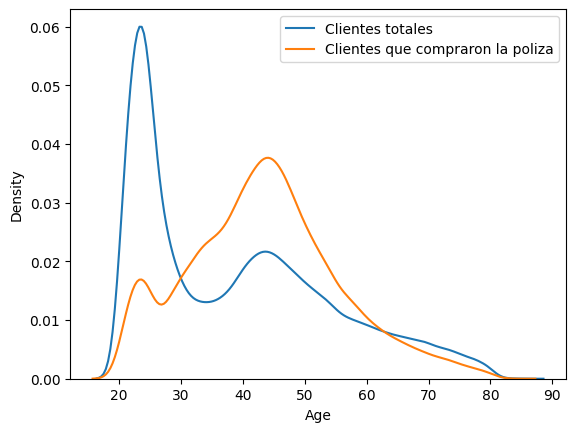

In [68]:
#Gráfico de densidad (KDE):
sns.kdeplot(train.Age, label="Clientes totales")
sns.kdeplot(train.Age[train.Response == 1], label="Clientes que compraron la poliza")
plt.legend()
plt.show()


Este gráfico de densidad de kernel (KDE) es una forma más suave y continua de visualizar la distribución de las edades de los clientes. A diferencia de un histograma, el KDE puede proporcionar una representación más precisa de la distribución de los datos.

A partir de este gráfico, podemos hacer varias observaciones:

La curva azul representa la distribución de edades de todos los clientes. Notamos un pico alrededor de los 20-30 años, lo que sugiere que la mayoría de los clientes son jóvenes, como también observamos en el histograma.

La curva naranja representa la distribución de edades de los clientes que han comprado la póliza de seguro. Esta curva muestra una distribución bastante diferente a la de todos los clientes. Parece que hay un pico más alto en el rango de edad de alrededor de 38-45 años, lo que indica que estos clientes son los más propensos a comprar una póliza de seguro.

Además, la distribución de los compradores de pólizas parece ser más amplia, indicando una mayor variabilidad en las edades de estos clientes en comparación con la población total de clientes.

Estos hallazgos sugieren que la edad puede ser un factor importante en la decisión de un cliente de comprar una póliza de seguro, y podría ser una característica útil a tener en cuenta en nuestro modelo de predicción. Sin embargo, se necesitaría un análisis más detallado para confirmar esta suposición y determinar la naturaleza exacta de la relación entre la edad y la compra de la póliza de seguro.

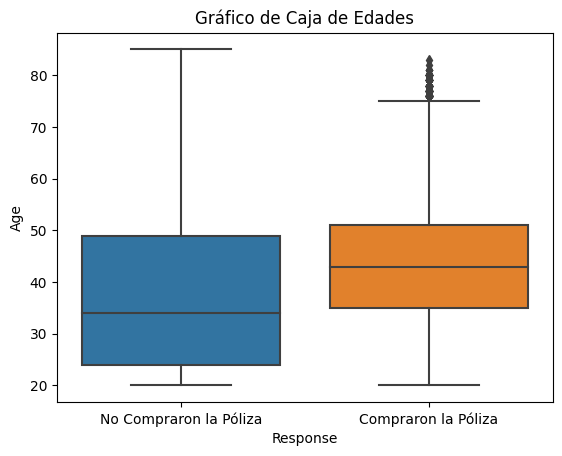

In [69]:
# Gráfico de Caja para comparar las edades de los clientes que compraron la póliza con los que no lo hicieron
sns.boxplot(x='Response', y='Age', data=train)
plt.xticks([0, 1], ['No Compraron la Póliza', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Edades')
plt.show()


El gráfico de caja muestra la distribución de las edades de los clientes que adquirieron la póliza y los que no. La línea en medio de cada caja (la mediana) indica que los clientes que no adquirieron la póliza son generalmente más jóvenes que aquellos que sí lo hicieron. Esta observación puede sugerir que los clientes de mayor edad están más interesados en adquirir la póliza de seguro. No obstante, será necesario un análisis más profundo para confirmar esta suposición inicial.

anual premium y clientes que respondieron 1 

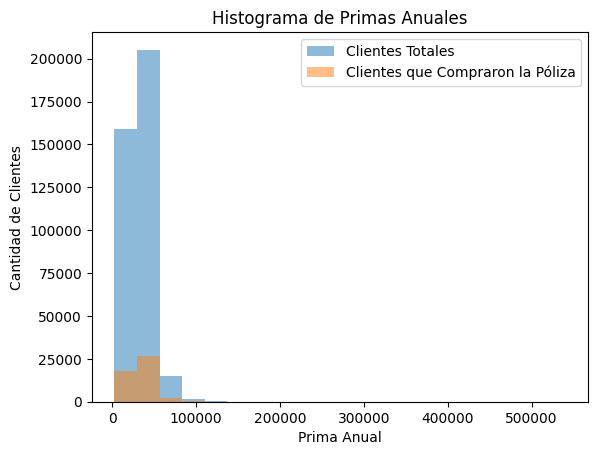

In [26]:
plt.hist(train['Annual_Premium'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Annual_Premium'], bins=20, alpha=0.5, label='Clientes que Compraron la Póliza')
plt.xlabel('Prima Anual')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Primas Anuales')
plt.show()


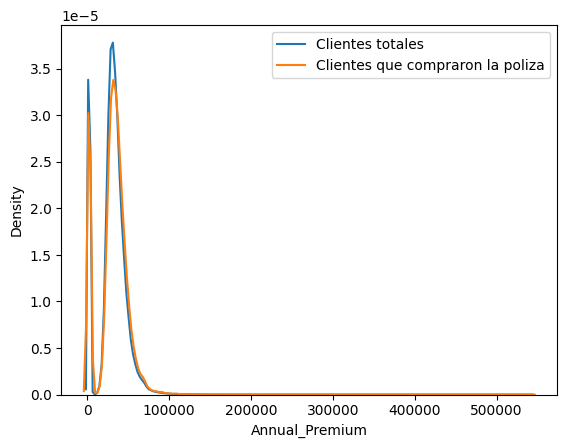

In [70]:
sns.kdeplot(train.Annual_Premium, label="Clientes totales")
sns.kdeplot(train.Annual_Premium[train.Response == 1], label="Clientes que compraron la poliza")
plt.legend()
plt.show()


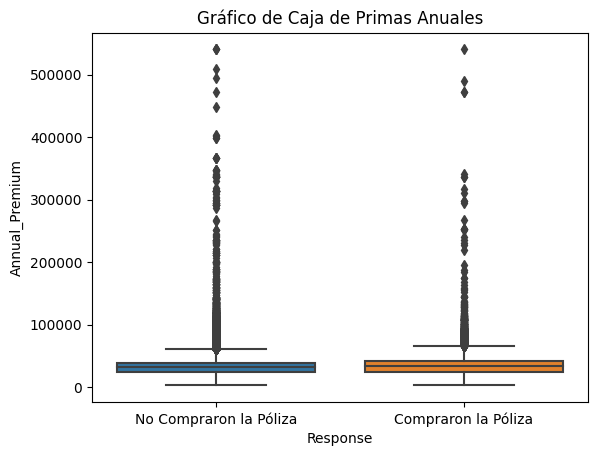

In [22]:
sns.boxplot(x='Response', y='Annual_Premium', data=train)
plt.xticks([0, 1], ['No Compraron la Póliza', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Primas Anuales')
plt.show()


El análisis de las gráficas sugiere que no existe una correlación directa y evidente entre la 'Prima Anual' (Annual_Premium) y la decisión del cliente de adquirir el seguro (Response). La distribución similar de los clientes que adquirieron y no adquirieron la póliza en términos de la 'Prima Anual' indica que este factor, por sí solo, puede no ser un fuerte predictor de la decisión del cliente. Es importante recordar que las relaciones en los datos pueden ser más complejas y no lineales, y podrían no ser visibles a través de un análisis gráfico univariante, por lo que es crucial llevar a cabo un análisis más detallado utilizando técnicas de modelado de datos

Vintage y clientes que respondieron 1 

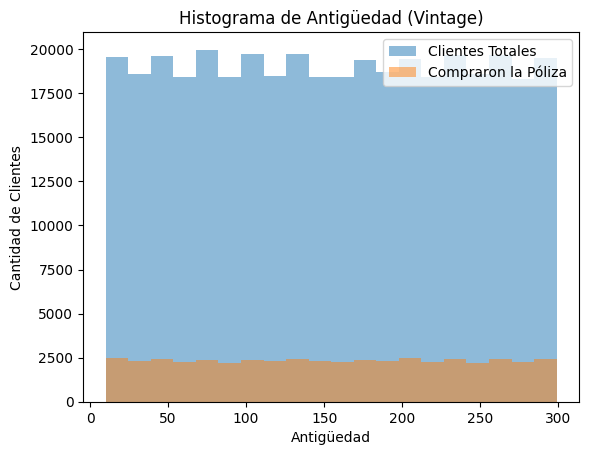

In [14]:
plt.hist(train['Vintage'], bins=20, alpha=0.5, label='Clientes Totales')
plt.hist(train[train['Response'] == 1]['Vintage'], bins=20, alpha=0.5, label='Compraron la Póliza')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.legend(loc='upper right')
plt.title('Histograma de Antigüedad (Vintage)')
plt.show()


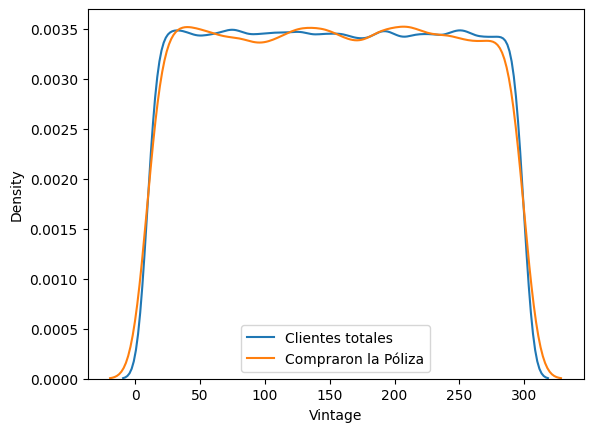

In [15]:
sns.kdeplot(train.Vintage, label="Clientes totales")
sns.kdeplot(train.Vintage[train.Response == 1], label="Compraron la Póliza")
plt.legend()
plt.show()


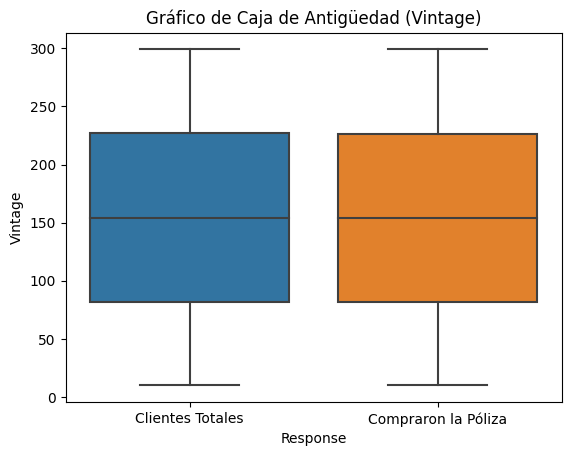

In [16]:
sns.boxplot(x='Response', y='Vintage', data=train)
plt.xticks([0, 1], ['Clientes Totales', 'Compraron la Póliza'])
plt.title('Gráfico de Caja de Antigüedad (Vintage)')
plt.show()


Analizando las gráficas, podemos ver que las distribuciones son muy similares para los clientes totales y los que compraron la póliza. Esto sugiere que la 'Antigüedad' del cliente con la compañía no parece ser un factor determinante en la decisión de comprar la póliza de seguro.

Relacion entre las variables 

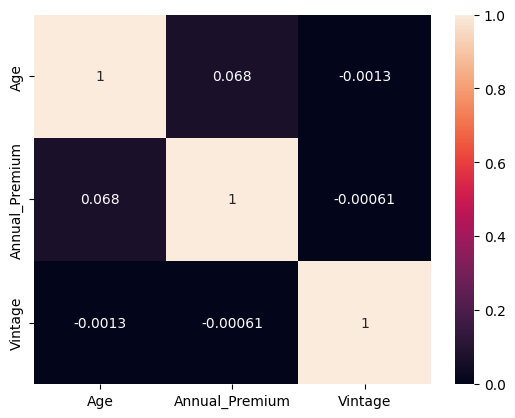

In [71]:
correlation_matrix = train[['Age', 'Annual_Premium', 'Vintage']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

La correlación entre Edad y Antigüedad (Vintage) es -0.0013, lo que indica una correlación negativa extremadamente débil. Esto sugiere que no hay una relación lineal clara entre la edad del cliente y el tiempo que ha estado asociado con la compañía.

La correlación entre Antigüedad (Vintage) y Prima Anual (Annual Premium) es -0.00061, también indicando una correlación negativa muy débil. Esto sugiere que el tiempo que un cliente ha estado con la compañía no tiene una influencia significativa en la prima anual que paga.

La correlación entre Edad y Prima Anual (Annual Premium) es 0.068, indicando una correlación positiva muy débil. Esto sugiere que la edad del cliente puede tener una influencia mínima sobre la prima anual que paga, pero es probable que otros factores sean más determinantes.

Relacion de las variables binarias

Genero con respecto a si compraro la poliza

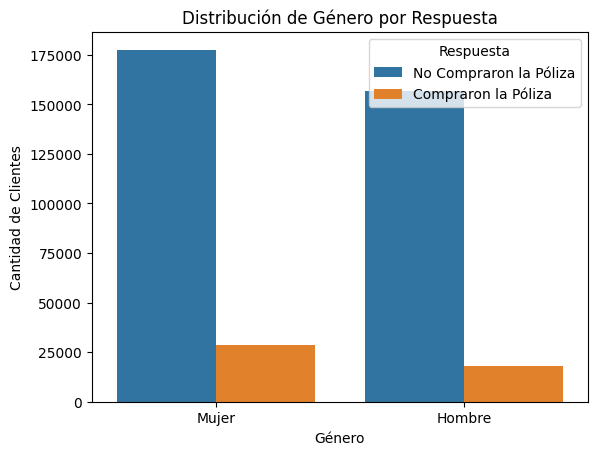

In [72]:
sns.countplot(x='Gender', hue='Response', data=train)
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Género por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['Mujer', 'Hombre'])
plt.show()


In [8]:
cross_tab_gender = pd.crosstab(train['Response'], train['Gender'])
cross_tab_gender.columns = ['Femenino', 'Masculino'] # Puedes ajustar estos nombres según las categorías de tu variable de género
cross_tab_gender.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_gender)


                        Femenino  Masculino
No Compraron la Póliza    156835     177564
Compraron la Póliza        18185      28525


Licencia y response

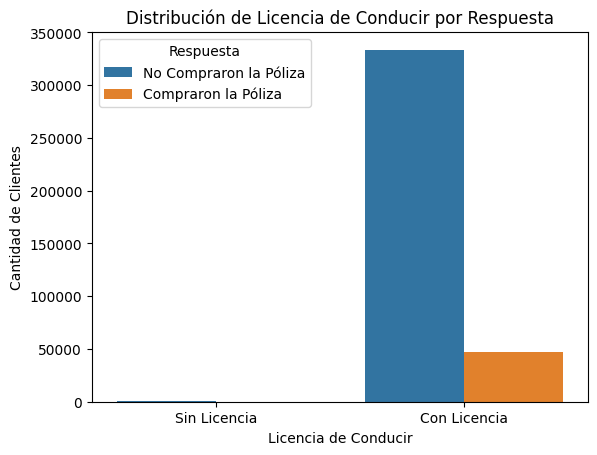

In [38]:
sns.countplot(x='Driving_License', hue='Response', data=train)
plt.xlabel('Licencia de Conducir')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Licencia de Conducir por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['Sin Licencia', 'Con Licencia'])
plt.show()


In [26]:
cross_tab = pd.crosstab(train['Response'], train['Driving_License'])
cross_tab.columns = ['Sin Licencia', 'Con Licencia']
cross_tab.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab)


                        Sin Licencia  Con Licencia
No Compraron la Póliza           771        333628
Compraron la Póliza               41         46669


con seguro de vehiculo en otra compa;ia 

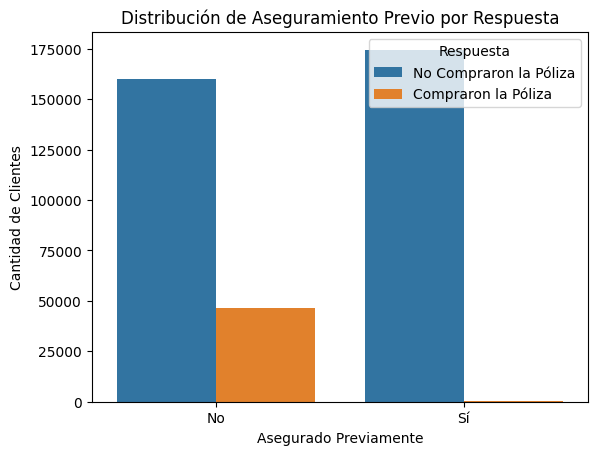

In [39]:
sns.countplot(x='Previously_Insured', hue='Response', data=train)
plt.xlabel('Asegurado Previamente')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Aseguramiento Previo por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


In [74]:
cross_tab_previously_insured = pd.crosstab(train['Response'], train['Previously_Insured'])
cross_tab_previously_insured.columns = ['No Asegurado Prev.', 'Asegurado Prev.']
cross_tab_previously_insured.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_previously_insured)


                        No Asegurado Prev.  Asegurado Prev.
No Compraron la Póliza              159929           174470
Compraron la Póliza                  46552              158


Vehiculo Da;ado

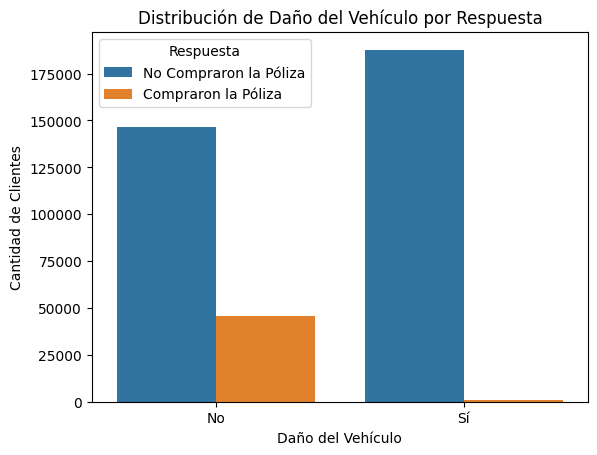

In [40]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=train)
plt.xlabel('Daño del Vehículo')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Daño del Vehículo por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


In [44]:
cross_tab_vehicle_damage = pd.crosstab(train['Response'], train['Vehicle_Damage'])
cross_tab_vehicle_damage.columns = ['Sin Daño', 'Con Daño']
cross_tab_vehicle_damage.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_vehicle_damage)


                        Sin Daño  Con Daño
No Compraron la Póliza    187714    146685
Compraron la Póliza          982     45728


a;o del vehiculo

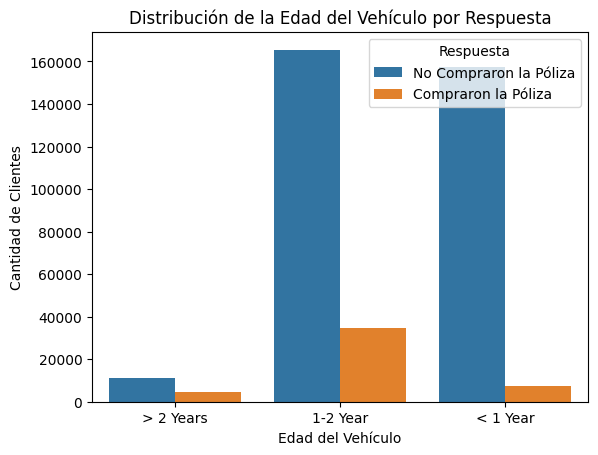

In [41]:
sns.countplot(x='Vehicle_Age', hue='Response', data=train)
plt.xlabel('Edad del Vehículo')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de la Edad del Vehículo por Respuesta')
plt.legend(title='Respuesta', labels=['No Compraron la Póliza', 'Compraron la Póliza'])
plt.show()


In [43]:
cross_tab_vehicle_age = pd.crosstab(train['Response'], train['Vehicle_Age'])
cross_tab_vehicle_age.index = ['No Compraron la Póliza', 'Compraron la Póliza']
print(cross_tab_vehicle_age)


Vehicle_Age             1-2 Year  < 1 Year  > 2 Years
No Compraron la Póliza    165510    157584      11305
Compraron la Póliza        34806      7202       4702


Transformacion de variables a binarias a numericas 

In [27]:
Variables_categoricas=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [28]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
train=pd.get_dummies(train,drop_first=True)
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [34]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,44,1,0,40454.0,217,1,0,1,1
1,1,76,1,0,33536.0,183,0,0,0,0
2,1,47,1,0,38294.0,27,1,0,1,1
3,1,21,1,1,28619.0,203,0,1,0,0
4,0,29,1,1,27496.0,39,0,1,0,0


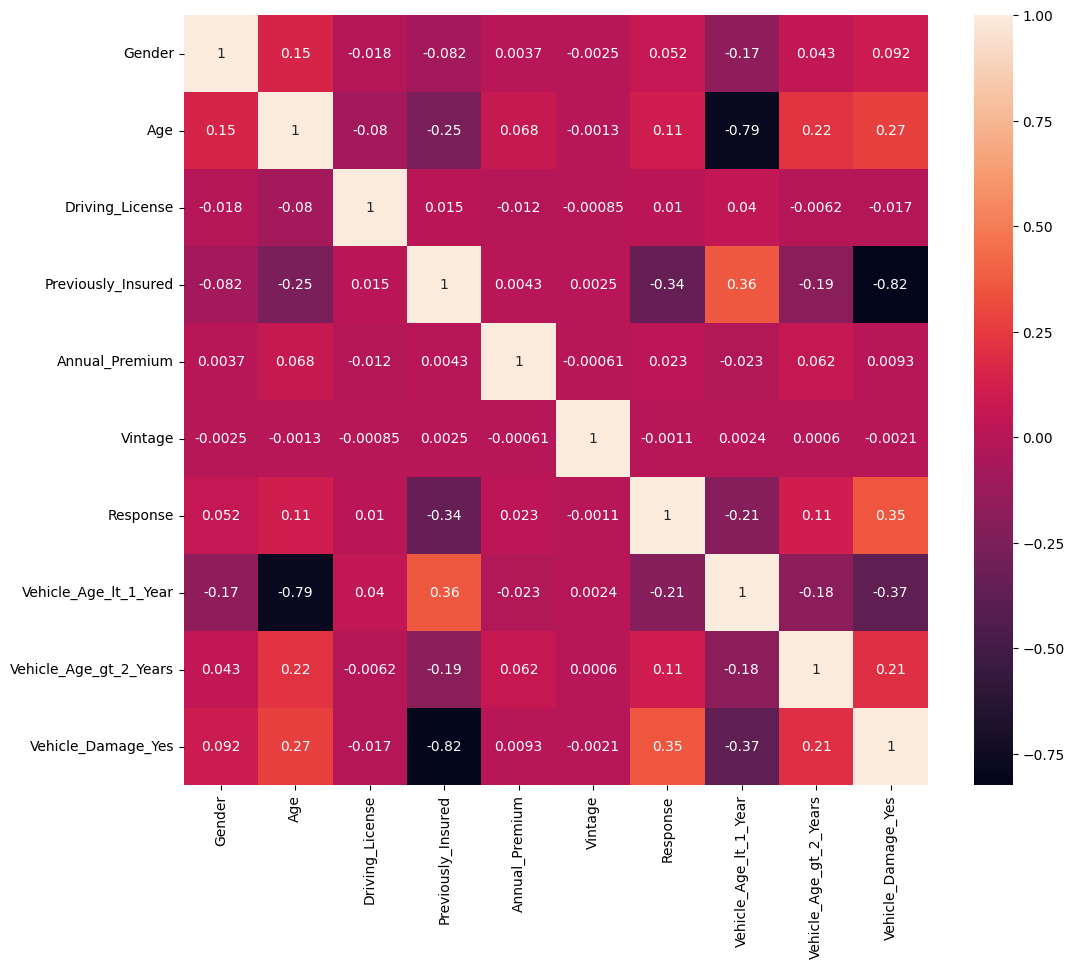

In [6]:
plt.figure(figsize=(12, 10)) # Puedes ajustar estos números según tus necesidades
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Ahora se normalizan las variables age y vintage, y ademas se escala la variable anual premium entre 0 y 1

In [29]:
nor = ['Age', 'Vintage']
standard_scaler = StandardScaler().fit(train[nor])
train[nor] = standard_scaler.transform(train[nor])


La variable 'Annual_Premium' ocupa un lugar especial en nuestro análisis debido a su naturaleza y significado. Representa una cantidad monetaria, específicamente la prima anual que un cliente ya ha pagado por su seguro de salud con la compañía. Dada su naturaleza monetaria, los valores de esta variable están en una escala significativamente mayor que las demás variables en el conjunto de datos, como la edad del cliente o la antigüedad del vehículo ('Vintage').

La decisión de no normalizar 'Annual_Premium' junto con 'Age' y 'Vintage' fue tomada de manera deliberada, basada en una comprensión de lo que cada una de estas variables representa en el contexto del problema. Mientras que 'Age' y 'Vintage' son medidas de tiempo y, por lo tanto, se benefician de la normalización para colocarlas en una escala comparable, 'Annual_Premium' tiene una naturaleza distinta.

La escala de 'Annual_Premium' no es simplemente una cuestión de magnitud; refleja la realidad económica de los costos del seguro de salud ya pagados. Reducirla a la misma escala que las otras variables, como la edad o la antigüedad del vehículo, podría haber llevado a una pérdida de información contextual vital. Al mantener la estructura de los datos y escalar 'Annual_Premium' en el rango [0, 1], preservo las diferencias relativas entre los valores sin dejar que su mayor magnitud distorsione el modelo.

In [30]:
mm = MinMaxScaler().fit(train[['Annual_Premium']])
train[['Annual_Premium']] = mm.transform(train[['Annual_Premium']])


In [31]:
# Mapeo de género para el conjunto de prueba
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
# Obtener las variables dummies
test = pd.get_dummies(test, drop_first=True)
# Renombrar columnas
test = test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
# Cambio de tipos de datos
test['Vehicle_Age_lt_1_Year'] = test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years'] = test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes'] = test['Vehicle_Damage_Yes'].astype('int')
# Aplicar los mismos escaladores
test[nor] = standard_scaler.transform(test[nor])
test[['Annual_Premium']] = mm.transform(test[['Annual_Premium']])


In [32]:
# Separar las etiquetas
train_target = train['Response']
train = train.drop(['Response'], axis=1)

In [10]:
train.head()

,Gender,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,0,0.070366,0.748795,0,1,1
1,1,2.396751,1,0,0.057496,0.342443,0,0,0
2,1,0.527181,1,0,0.066347,-1.521998,0,1,1
3,1,-1.148985,1,1,0.048348,0.581474,1,0,0
4,0,-0.633242,1,1,0.046259,-1.378580,1,0,0


In [33]:
# División en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(train, train_target, random_state=0)


Modelo desicion tree

In [34]:
# Parámetros para la búsqueda
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10]
}

In [35]:
# Crea un clasificador de árbol de decisión
tree_clf = DecisionTreeClassifier()

In [39]:
# Configura la búsqueda aleatoria
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_dist, n_iter=10, cv=4, verbose=1, random_state=42, n_jobs=-1)


In [40]:
# Ajusta el modelo
random_search.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10]},
                   random_state=42, verbose=1)

Evaluar el modelo

In [41]:
# Evaluar el Modelo
print("Mejores parámetros: ", random_search.best_params_)
best_model = random_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Precisión en el conjunto de prueba: ", test_accuracy)


Mejores parámetros:  {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 7, 'criterion': 'gini'}
Precisión en el conjunto de prueba:  0.8774953294569575


In [20]:
#Guardar el arbol en pdf 
dot_data = export_graphviz(best_model, out_file=None, feature_names=train.columns,
                           class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Decision_Tree")  # Esto guardará el árbol en un archivo llamado "Decision_Tree"


'Decision_Tree.pdf'

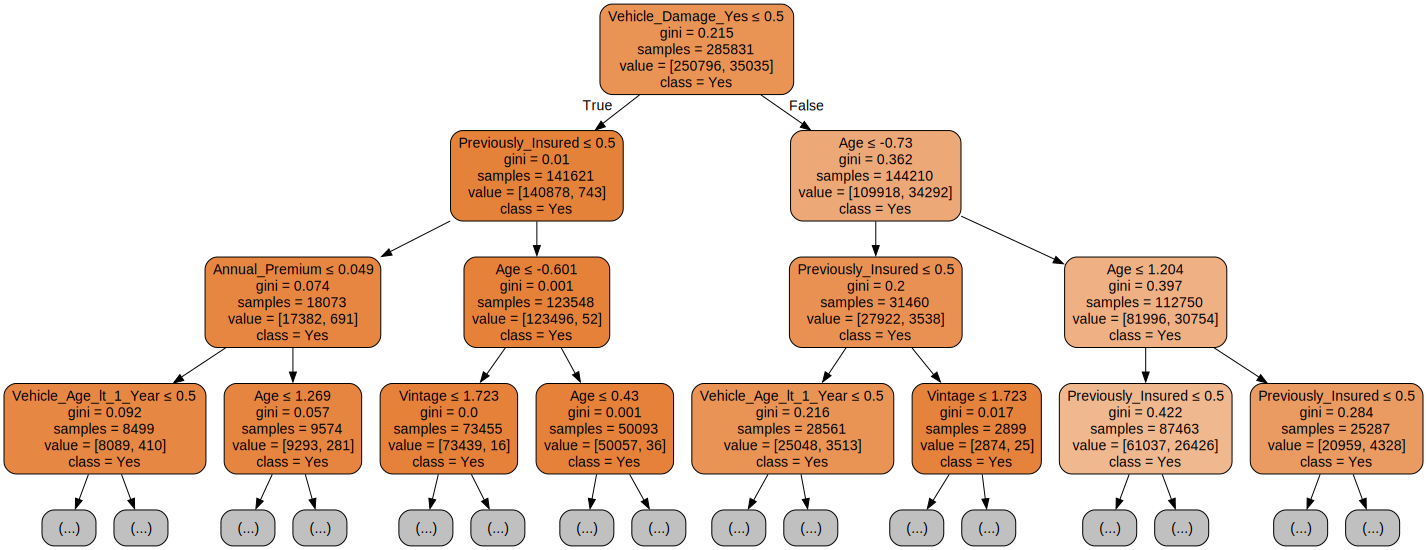

In [42]:
dot_data = export_graphviz(best_model, max_depth = 3,
                      out_file=None, 
                      feature_names=train.columns,       # Cambiado de X.columns a train.columns
                      class_names=['Yes','No'],
                      filled=True, rounded=True,
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


Calculamos el auc

In [46]:
# Obtener las probabilidades de la clase positiva
y_probs = best_model.predict_proba(x_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.8431988749929852


In [47]:
# Predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8774953294569575
Confusion Matrix:
 [[83594     9]
 [11663    12]]
Precision: 0.5714285714285714
Recall: 0.0010278372591006424
F1 Score: 0.0020519835841313274


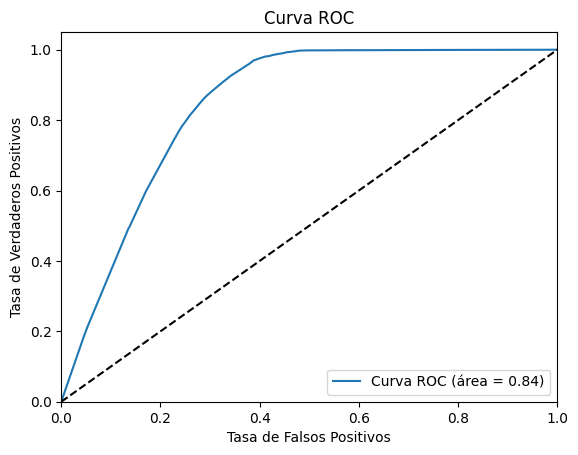

In [48]:

# Obtener las probabilidades de la clase positiva
y_probs = best_model.predict_proba(x_test)[:, 1]

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


RANDOM FOREST

In [49]:
# Parámetros para la búsqueda
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10]
}

In [50]:
# Crea un clasificador de Random Forest
rf_clf = RandomForestClassifier()

# Configura la búsqueda aleatoria
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=10, cv=4, verbose=1, random_state=42, n_jobs=-1)

# Ajusta el modelo
random_search_rf.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, verbose=1)

In [51]:
# Evaluar el Modelo usando el mejor modelo obtenido por RandomizedSearchCV
best_model_rf = random_search_rf.best_estimator_
test_accuracy_rf = best_model_rf.score(x_test, y_test)
print("Precisión en el conjunto de prueba: ", test_accuracy_rf)


Precisión en el conjunto de prueba:  0.8775163206616428


AUC-ROC para Random Forest: 0.8453823058561083


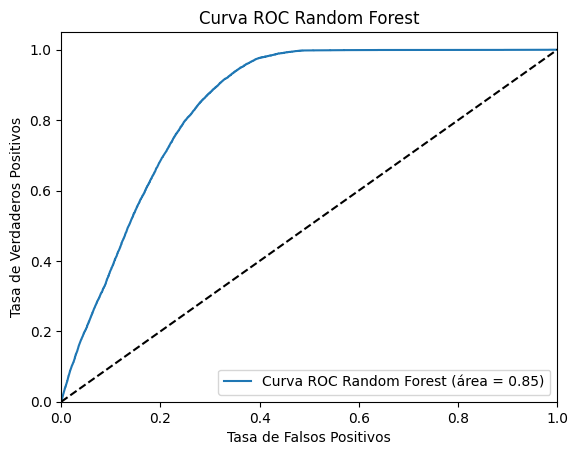

In [52]:
# Obtener las probabilidades de la clase positiva
y_probs_rf = random_search_rf.predict_proba(x_test)[:, 1]

# Calcular el AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_probs_rf)
print("AUC-ROC para Random Forest:", auc_roc_rf)

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Curva ROC Random Forest (área = %0.2f)' % auc_roc_rf)
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

Naive bayes

In [53]:
# Crear un clasificador Gaussian Naive Bayes
gnb = GaussianNB()

# Entrenar el modelo
gnb.fit(x_train, y_train)

# Predicción
y_pred = gnb.predict(x_test)

In [54]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6929301622620122
Confusion Matrix:
 [[55248 28355]
 [  902 10773]]
Precision: 0.2753271314659579
Recall: 0.9227408993576017
F1 Score: 0.42410881247170445


AUC-ROC: 0.8193583982788442


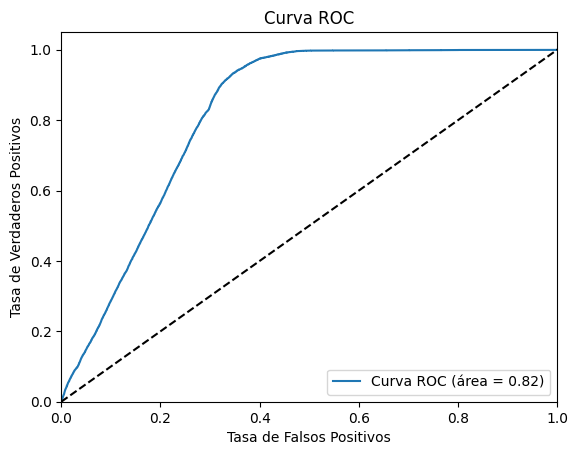

In [55]:
# Obtener las probabilidades de la clase positiva
y_probs = gnb.predict_proba(x_test)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", auc_roc)

# Calcular los valores de la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Inteligencia artificial con pytorch

In [56]:
# Splitting the dataset
mm = MinMaxScaler()
x_train[['Vintage']] = mm.fit_transform(x_train[['Vintage']])
x_test[['Vintage']] = mm.transform(x_test[['Vintage']])


In [59]:
# Create PyTorch tensors for train and test data
x_train_tensor = torch.tensor(x_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
x_test_tensor = torch.tensor(x_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))

In [60]:
# Create DataLoader for batching
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [61]:
class Model(nn.Module):
    def __init__(self, input_shape):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_shape, 24)
        self.fc2 = nn.Linear(24, 20)
        self.fc3 = nn.Linear(20, 2)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01) # puedes cambiar el valor aquí
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01) # y aquí si lo deseas
        x = F.softmax(self.fc3(x), dim=1)
        return x


In [62]:
# Instantiate the model
model = Model(x_train.shape[1])

Explorar que clases son minoritarias 

In [65]:
class_counts = y_train.value_counts()
print(class_counts)


Response
0    250796
1     35035
Name: count, dtype: int64


In [69]:
# Define the class weights and convert to Float
class_0_weight = 1 / y_train.value_counts()[0]
class_1_weight = 1 / y_train.value_counts()[1]
class_weights = torch.tensor([class_0_weight, class_1_weight], dtype=torch.float)


# Define loss and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters())


In [70]:
# Training loop
EPOCHS = 5

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

# Forward pass on test data
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    predicted_labels = torch.argmax(test_outputs, dim=1)


Epoch: 0, Loss: 0.5431744456291199
Epoch: 1, Loss: 0.9882735013961792
Epoch: 2, Loss: 0.31515225768089294
Epoch: 3, Loss: 0.4546927511692047
Epoch: 4, Loss: 0.4312363564968109


In [72]:

# Calculate accuracy
accuracy = (predicted_labels == y_test_tensor).float().mean()
print(f'Accuracy: {accuracy.item()}')

# Calculate loss using the CrossEntropyLoss function
loss = criterion(test_outputs, y_test_tensor)
print(f'Loss: {loss.item()}')

Accuracy: 0.7015575766563416
Loss: 0.5111836791038513


Probar el modelo con los datos de prueb

In [78]:
# Convertir los datos de prueba en un tensor
x_test_tensor = torch.tensor(test.values.astype(np.float32))

# Pasar los datos de prueba a través del modelo
with torch.no_grad():
    test_outputs = model(x_test_tensor)

# Obtener las etiquetas predichas
predicted_labels = torch.argmax(test_outputs, dim=1)




tensor([0, 1, 1, 0, 0, 0, 0, 0, 1, 0])


In [82]:
print(predicted_labels[:150])  # Imprime las primeras 10 predicciones

tensor([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0])


In [13]:
Variables_categoricas=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
print("Estadisticas descriptivas de los datos de categorias:")
for category in categorical_columns:
    print(train[category].value_counts(), '\n______________________\n')